In [1]:
import supervision as sv
import numpy as np
import pathlib  


In [2]:
target_folder = pathlib.Path('/home/alalbiol/Data/mamo/inbreast_yolo/validation/labels')
pred_folder = pathlib.Path('/home/alalbiol/Data/mamo/inbreast_yolo/validation/fasterrcnn_predictions')

In [8]:
def read_gt_yolo(annotations_file):
    annotations = []
    with open(annotations_file, 'r') as f:
        for line in f:
            fields = line.strip().split()
            x_center = float(fields[1])
            y_center = float(fields[2])
            width = float(fields[3])
            height = float(fields[4])
            x1 = x_center - width/2
            y1 = y_center - height/2
            x2 = x_center + width/2
            y2 = y_center + height/2
            class_id = int(fields[0])
            anot = [x1, y1, x2, y2, class_id]
            annotations.append(anot)
        if len(annotations) == 0:
            annotations.append([0, 0, 0, 0, 0])
    return np.array(annotations)


def read_prediction(annotations_file, confidence_threshold=0.5):
    annotations = []
    with open(annotations_file, 'r') as f:
        for line in f:
            fields = line.strip().split()
            x_center = float(fields[0])
            y_center = float(fields[1])
            width = float(fields[2])
            height = float(fields[3])
            x1 = x_center - width/2
            y1 = y_center - height/2
            x2 = x_center + width/2
            y2 = y_center + height/2
            class_id = float(fields[5])
            condidence = float(fields[4])
            if condidence < confidence_threshold:
                continue
            anot = [x1, y1, x2, y2, class_id, condidence]
            annotations.append(anot)
        if len(annotations) == 0:
            annotations.append([0, 0, 0, 0, 0,0])
    return np.array(annotations)


def read_all(target_folder, pred_folder, confidence_threshold=0.5):
    target_files = list(target_folder.glob('*.txt'))
    targets = []
    predictions = []
    
    for target_file in target_files:
        targets.append(read_gt_yolo(target_file))
        pred_file = pred_folder / target_file.name
        pred = read_prediction(pred_file, confidence_threshold=confidence_threshold)
        predictions.append(pred)
        
    return targets, predictions


In [11]:
ths = np.linspace(0, 1, 11)

map50 = []

for th in ths:
    targets, predictions = read_all(target_folder, pred_folder, confidence_threshold=th)

    mean_average_precison = sv.MeanAveragePrecision.from_tensors(
        predictions=predictions,
        targets=targets)

    map50.append(mean_average_precison.map50)
    
    print(f"Threshold: {th:.2f} mAP50: {mean_average_precison.map50:.2f}")
    

Threshold: 0.00 mAP50: 0.17
Threshold: 0.10 mAP50: 0.18
Threshold: 0.20 mAP50: 0.19
Threshold: 0.30 mAP50: 0.19
Threshold: 0.40 mAP50: 0.20
Threshold: 0.50 mAP50: 0.21


/home/alalbiol/miniconda3/envs/Mammo/lib/python3.11/site-packages/supervision/detection/utils.py:59: RuntimeWarning: invalid value encountered in divide
  return area_inter / (area_true[:, None] + area_detection - area_inter)


Threshold: 0.60 mAP50: 0.21
Threshold: 0.70 mAP50: 0.21
Threshold: 0.80 mAP50: 0.20
Threshold: 0.90 mAP50: 0.16
Threshold: 1.00 mAP50: 0.00


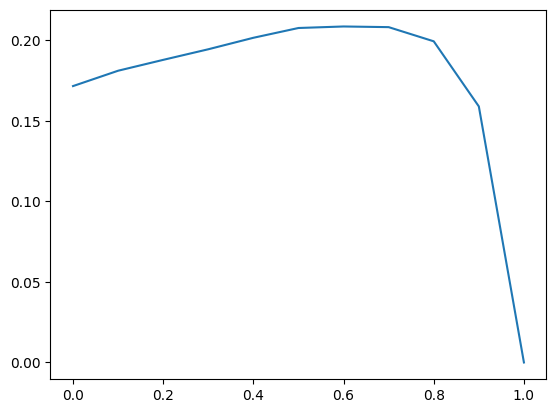

In [12]:
import matplotlib.pyplot as plt
plt.plot(ths, map50)

In [5]:
predictions[0]

array([[0, 0, 0, 0, 0, 0]])